In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving web_page_data.csv to web_page_data.csv


In [3]:
df=pd.read_csv('web_page_data.csv')
df.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [4]:
df.columns=df.columns.str.lower()
df.head(1)

,page,time
0,Page A,0.21


In [ ]:
# page вид страницы
# time время, которое пользователь провел на странице

In [ ]:
df.info() # нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   page    36 non-null     object 
 1   time    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [ ]:
df.page.value_counts()

page
Page A    21
Page B    15
Name: count, dtype: int64

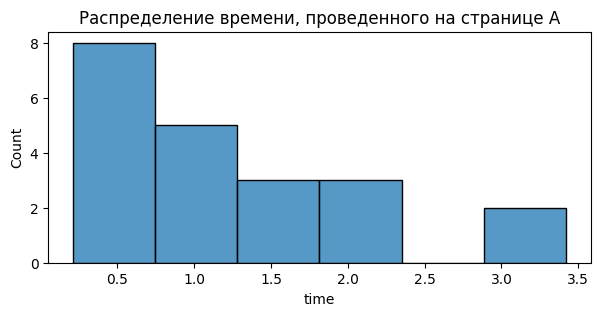

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(x=df[df.page=='Page A'].time);
plt.title('Распределение времени, проведенного на странице А');

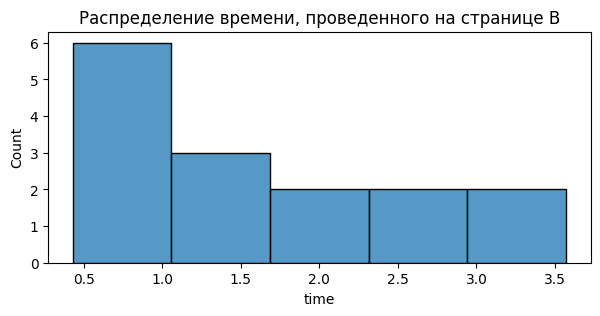

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(x=df[df.page=='Page B'].time);
plt.title('Распределение времени, проведенного на странице В');

In [ ]:
# визуально распределения времени не нормальны

In [ ]:
df.groupby('page').agg({'time':'mean'})

,time
page,
Page A,1.263333
Page B,1.620000


In [ ]:
# среднее время на странице 'В' больше на ~ 36 секунд

In [5]:
df.groupby('page').agg({'time':'median'})

,time
page,
Page A,0.95
Page B,1.47


In [ ]:
# медиана времени на странице 'В' больше на 52 секунды

In [ ]:
# для сравнения средних в данном случае не подходит t-тест, распределения
# времени не нормальны, данных очень мало

In [ ]:
stats.mannwhitneyu(df[df.page=='Page A'].time, df[df.page=='Page B'].time)

MannwhitneyuResult(statistic=119.5, pvalue=0.22880908661199295)

In [ ]:
# по результату теста распределения из одной генеральной совокупности

In [ ]:
# бутстреп для построения 95% доверительного интервала для разности между
# средними значениями времени
bootstrap=[]
for _ in range(1000):
  c=np.random.choice(df[df.page=='Page A'].time, 21, True)
  t=np.random.choice(df[df.page=='Page B'].time, 15, True)
  bootstrap.append(np.mean(t)-np.mean(c))
print('Среднее время изменилось на: ', \
      np.mean(df[df.page=='Page B'].time)-np.mean(df[df.page=='Page A'].time))
print('95% доверительный интервал: ', np.quantile(bootstrap, 0.025), ' ', \
      np.quantile(bootstrap, 0.975))

Среднее время изменилось на:  0.3566666666666669
95% доверительный интервал:  -0.276795238095238   1.006495238095238


In [ ]:
# по результатам бутстрепа статистически значимых различий между средними
# значениями времени, проведенного на странице, нет

In [9]:
# бутстреп для построения 95% доверительного интервала для разности между
# медианами времени
bootstrap=[]
for _ in range(1000):
  c=np.random.choice(df[df.page=='Page A'].time, 21, True)
  t=np.random.choice(df[df.page=='Page B'].time, 15, True)
  bootstrap.append(np.median(t)-np.median(c))
print('Медиана времени изменилось на: ', \
      np.median(df[df.page=='Page B'].time)-np.median(df[df.page=='Page A'].time))
print('95% доверительный интервал: ', np.quantile(bootstrap, 0.025), ' ', \
      np.quantile(bootstrap, 0.975))

Медиана времени изменилось на:  0.52
95% доверительный интервал:  -0.47   1.37


In [ ]:
# по результатам бутстрепа статистически значимых различий между медианами
# времени, проведенного на странице, нет

In [ ]:
# по результатам анализа можно рекомендовать оставить изначальную страницу А,
# так как не обнаружено старистически значимых различий как между средними, так
# и между медианами времени, проведенного на странице